In [1]:
%pylab inline
import pandas as pd
import scipy
%load_ext autoreload
%autoreload 2
from analysis_toolbox import *

Populating the interactive namespace from numpy and matplotlib


# Overall Distribution 

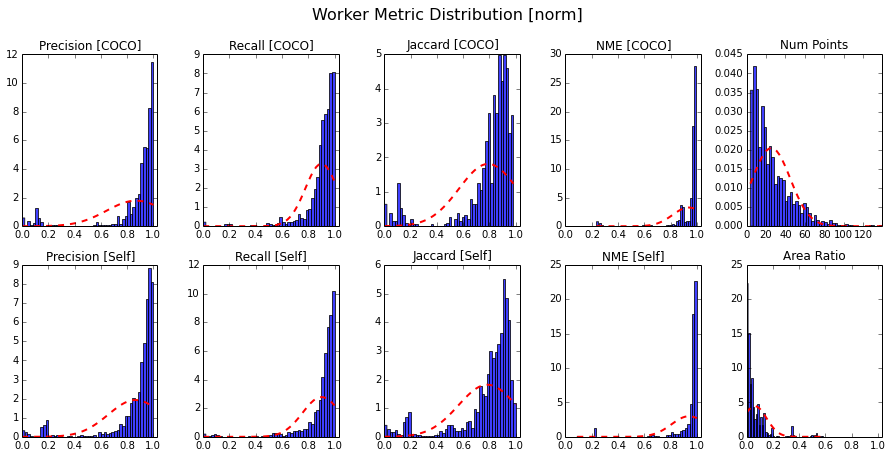

In [4]:
plot_fitted_worker_histo(scipy.stats.norm)

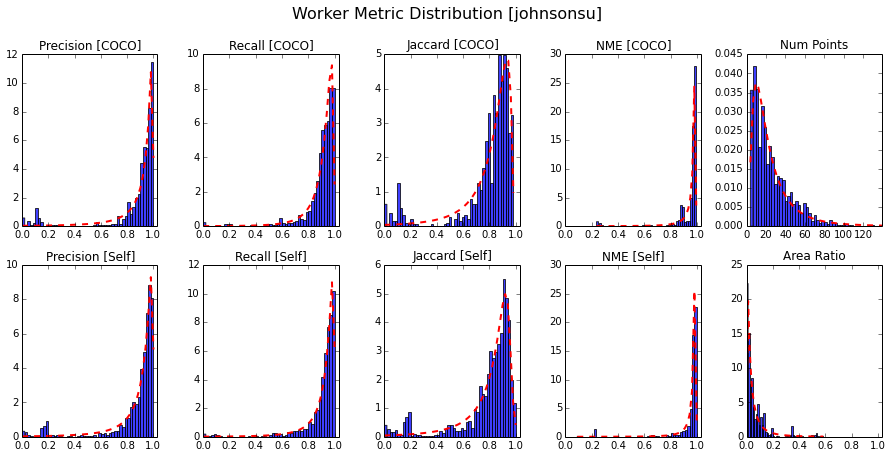

In [5]:
plot_fitted_worker_histo(scipy.stats.johnsonsu)

##### Generating Table 1

In [2]:
compute_all_stats()
compute_all_stats(FILTER_CRITERION=0.6)

\begin{tabular}{lrr}
\hline
 All              &   Mean &     SD \\
\hline
 Precision [COCO] &  0.87  &  0.22  \\
 Recall [COCO]    &  0.9   &  0.12  \\
 Jaccard [COCO]   &  0.79  &  0.22  \\
 NME [COCO]       &  0.94  &  0.12  \\
 Num Points       & 26     & 19     \\
 Precision [Self] &  0.86  &  0.21  \\
 Recall [Self]    &  0.9   &  0.14  \\
 Jaccard [Self]   &  0.78  &  0.22  \\
 NME [Self]       &  0.94  &  0.13  \\
 Area Ratio       &  0.063 &  0.089 \\
\hline
\end{tabular}
\begin{tabular}{lrr}
\hline
 Filter\ensuremath{>}0.6       &   Mean &     SD \\
\hline
 Precision [COCO] &  0.93  &  0.069 \\
 Recall [COCO]    &  0.92  &  0.072 \\
 Jaccard [COCO]   &  0.86  &  0.084 \\
 NME [COCO]       &  0.96  &  0.055 \\
 Num Points       & 26     & 19     \\
 Precision [Self] &  0.92  &  0.076 \\
 Recall [Self]    &  0.93  &  0.074 \\
 Jaccard [Self]   &  0.86  &  0.086 \\
 NME [Self]       &  0.96  &  0.053 \\
 Area Ratio       &  0.063 &  0.089 \\
\hline
\end{tabular}


##### Compute fitting coefficients for all possible functional fittings and store this data into a table, will take ~40 min to run

In [173]:
df_stats_tbl = compute_all_fittings()

  0%|          | 0/10 [00:00<?, ?it/s]

frechet_l : D = 0.26 ; p =0.06 ---> from same distribution
levy : D = 0.2 ; p =0.24 ---> from same distribution
nct : D = 0.26 ; p =0.06 ---> from same distribution
weibull_max : D = 0.26 ; p =0.06 ---> from same distribution

 10%|█         | 1/10 [00:26<04:01,  0.04it/s]


ncx2 : D = 0.26 ; p =0.06 ---> from same distribution
pareto : D = 0.2 ; p =0.24 ---> from same distribution
powerlognorm : D = 0.24 ; p =0.1 ---> from same distribution
wald : D = 0.26 ; p =0.06 ---> from same distribution

 20%|██        | 2/10 [00:49<03:17,  0.04it/s]


dweibull : D = 0.26 ; p =0.06 ---> from same distribution
levy : D = 0.22 ; p =0.15 ---> from same distribution

 30%|███       | 3/10 [01:09<02:42,  0.04it/s]


halfcauchy : D = 0.24 ; p =0.1 ---> from same distribution

 50%|█████     | 5/10 [01:59<01:59,  0.04it/s]


frechet_r : D = 0.24 ; p =0.1 ---> from same distribution
reciprocal : D = 0.22 ; p =0.15 ---> from same distribution
weibull_min : D = 0.24 ; p =0.1 ---> from same distribution

 60%|██████    | 6/10 [02:39<01:46,  0.04it/s]


frechet_l : D = 0.24 ; p =0.1 ---> from same distribution
frechet_r : D = 0.24 ; p =0.1 ---> from same distribution
wald : D = 0.26 ; p =0.06 ---> from same distribution
weibull_max : D = 0.24 ; p =0.1 ---> from same distribution
weibull_min : D = 0.24 ; p =0.1 ---> from same distribution

 70%|███████   | 7/10 [03:14<01:23,  0.04it/s]


beta : D = 0.2 ; p =0.24 ---> from same distribution
reciprocal : D = 0.2 ; p =0.24 ---> from same distribution

 80%|████████  | 8/10 [03:46<00:56,  0.04it/s]


exponweib : D = 0.26 ; p =0.06 ---> from same distribution
ncx2 : D = 0.18 ; p =0.36 ---> from same distribution
pareto : D = 0.2 ; p =0.24 ---> from same distribution
wald : D = 0.24 ; p =0.1 ---> from same distribution

 90%|█████████ | 9/10 [04:21<00:29,  0.03it/s]


invweibull : D = 0.22 ; p =0.15 ---> from same distribution

In [183]:
# sorted_df_stats_tbl = df_stats_tbl[df_stats_tbl["p-value"]>0.05].sort(["RSS","p-value"],ascending=[True,False])
# idx = sorted_df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==sorted_df_stats_tbl["RSS"]
# sorted_df_stats_tbl[idx]

##### Best fitting functions for each metric 

In [185]:
idx = df_stats_tbl.groupby(['metric'])['RSS'].transform(min) ==df_stats_tbl["RSS"]
df_stats_tbl[idx]

,metric,Function Name,Parameters,RSS,D-value,p-value
3,Precision [COCO],beta,"(94.9199240842, 0.969610078993, -7.84315798742...",9.113931,0.48,1.022699e-05
133,Recall [COCO],loggamma,"(0.0481347309123, 0.997966705501, 0.0046087175...",4.562850,0.46,2.763769e-05
200,Jaccard [COCO],gompertz,"(0.002288507401, 0.457472808578, 0.0711950705997)",13.312855,0.46,2.763769e-05
259,NME [COCO],cauchy,"(0.981588304686, 0.00865358537677)",51.670082,0.84,1.248758e-16
378,Num Points,johnsonsb,"(1.78906463355, 0.872683600529, 2.57126560216,...",0.000239,1.00,2.164688e-23
463,Precision [Self],johnsonsu,"(5.60677852705, 0.844861280829, 1.00448298037,...",6.826660,0.34,4.427949e-03
547,Recall [Self],johnsonsu,"(5.46750757986, 0.912177549296, 1.00526518455,...",5.494230,0.42,1.777837e-04
631,Jaccard [Self],johnsonsu,"(1.61491888233, 0.946641875046, 0.964153608486...",4.573405,0.28,3.166085e-02
679,NME [Self],cauchy,"(0.98156409667, 0.00925033988235)",35.632197,0.80,4.008887e-15
783,Area Ratio,gengamma,"(4.86158921952, 0.350470988837, 0.000438567258...",27.142858,0.34,4.427949e-03


#### Table 2 Best fitting functions

In [238]:
print tabulate(df_stats_tbl[idx].drop("Parameters",axis=1),showindex="False",headers='keys',tablefmt='latex',floatfmt='.3g')

\begin{tabular}{llrrr}
\hline
 metric           & Function Name   &       RSS &   D-value &   p-value \\
\hline
 Precision [COCO] & beta            &  9.11     &      0.48 &  1.02e-05 \\
 Recall [COCO]    & loggamma        &  4.56     &      0.46 &  2.76e-05 \\
 Jaccard [COCO]   & gompertz        & 13.3      &      0.46 &  2.76e-05 \\
 NME [COCO]       & cauchy          & 51.7      &      0.84 &  1.25e-16 \\
 Num Points       & johnsonsb       &  0.000239 &      1    &  2.16e-23 \\
 Precision [Self] & johnsonsu       &  6.83     &      0.34 &  0.00443  \\
 Recall [Self]    & johnsonsu       &  5.49     &      0.42 &  0.000178 \\
 Jaccard [Self]   & johnsonsu       &  4.57     &      0.28 &  0.0317   \\
 NME [Self]       & cauchy          & 35.6      &      0.8  &  4.01e-15 \\
 Area Ratio       & gengamma        & 27.1      &      0.34 &  0.00443  \\
\hline
\end{tabular}


#### Table 3: Johnson SU fitting results 

In [194]:
johnsonsu_tbl = df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].drop(['Parameters','Function Name'],axis=1)

In [221]:
bigpowtbl = df_stats_tbl[df_stats_tbl['Function Name']=='johnsonsu'].drop("Function Name",axis=1)
powtbl  = bigpowtbl['Parameters'].apply(pd.Series)
powtbl.columns =["xi","lambda","Shift","Scale"]
bigpowtbl = bigpowtbl.drop("Parameters",axis=1)

In [222]:
bigpowtbl.join(powtbl)

,metric,RSS,D-value,p-value,xi,lambda,Shift,Scale
43,Precision [COCO],10.040541,0.36,2.111951e-03,5.177937,0.750699,1.001447,0.000113
127,Recall [COCO],7.009698,0.44,7.159507e-05,5.913342,1.089807,1.006643,0.000617
211,Jaccard [COCO],13.537526,0.30,1.714441e-02,5.640332,1.115838,0.994723,0.001731
295,NME [COCO],217.919699,0.70,1.116526e-11,1.305715,0.612127,0.989977,0.003180
379,Num Points,0.000437,1.00,2.164688e-23,-6.229590,1.212153,0.795895,0.212017
463,Precision [Self],6.826660,0.34,4.427949e-03,5.606779,0.844861,1.004483,0.000184
547,Recall [Self],5.494230,0.42,1.777837e-04,5.467508,0.912178,1.005265,0.000290
631,Jaccard [Self],4.573405,0.28,3.166085e-02,1.614919,0.946642,0.964154,0.039441
715,NME [Self],107.279070,0.64,7.839819e-10,1.156889,0.614027,0.990525,0.003668
799,Area Ratio,30.389562,0.32,8.899159e-03,-4.900214,0.783876,-0.000196,0.000117


In [230]:
print tabulate(bigpowtbl.join(powtbl),showindex="False",headers='keys',tablefmt='latex',floatfmt='.2g')

\begin{tabular}{lrrrrrrr}
\hline
 metric           &      RSS &   D-value &   p-value &   xi &   lambda &   Shift &   Scale \\
\hline
 Precision [COCO] & 10       &      0.36 &   0.0021  &  5.2 &     0.75 &  1      & 0.00011 \\
 Recall [COCO]    &  7       &      0.44 &   7.2e-05 &  5.9 &     1.1  &  1      & 0.00062 \\
 Jaccard [COCO]   & 14       &      0.3  &   0.017   &  5.6 &     1.1  &  0.99   & 0.0017  \\
 NME [COCO]       &  2.2e+02 &      0.7  &   1.1e-11 &  1.3 &     0.61 &  0.99   & 0.0032  \\
 Num Points       &  0.00044 &      1    &   2.2e-23 & -6.2 &     1.2  &  0.8    & 0.21    \\
 Precision [Self] &  6.8     &      0.34 &   0.0044  &  5.6 &     0.84 &  1      & 0.00018 \\
 Recall [Self]    &  5.5     &      0.42 &   0.00018 &  5.5 &     0.91 &  1      & 0.00029 \\
 Jaccard [Self]   &  4.6     &      0.28 &   0.032   &  1.6 &     0.95 &  0.96   & 0.039   \\
 NME [Self]       &  1.1e+02 &      0.64 &   7.8e-10 &  1.2 &     0.61 &  0.99   & 0.0037  \\
 Area Ratio       & 

# $J_i$ worker distributions

In [82]:
import matplotlib.ticker as ticker
def plot_all_Ji_hist(fcn,SHOW_PLOT=10,NBINS=30):
    '''
    Plot all worker distributions for each object 
    compute fitting coefficients for each Ji distribution
    show SHOW_PLOT number of sample plots
    '''
    bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
    obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
    object_id_lst  = list(set(obj_sorted_tbl.object_id))
    metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',"NME [COCO]","Num Points",\
               'Precision [Self]','Recall [Self]','Jaccard [Self]',"NME [Self]","Area Ratio"]
    NUM_PLOTS = len(metrics_lst)
    NUM_ROW = 2
    NUM_COL = NUM_PLOTS/NUM_ROW
    data_fit_stats=[]
    for objid in object_id_lst:
        if SHOW_PLOT>0:
            fig, axs = plt.subplots(NUM_ROW,NUM_COL, figsize=(NUM_COL*2.5,NUM_ROW*3))
            stitle = fig.suptitle("J{} Distribution ".format(objid),fontsize=16,y=1.05)
            axs = axs.ravel()

        # Ji_tbl (bb_info) is the set of all workers that annotated object i 
        bb  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]
        for i,metric in zip(range(len(metrics_lst)),metrics_lst):
            if metric in ["Num Points"]:
                metric_value = np.array(bb[metric])
            else:
                #restrict range [0,1] for normalized measures
                metric_value = np.array(bb[metric][bb[metric]>0][bb[metric]<=1]) 
            params = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, *params)
            RSS =sum((histo-y)**2)
            ks_result = kolmogorov_smirnov(bins,y,fcn.name) #D-value and p-value
            # object_id, Metric, mu, sd,RSS,D-value,p-value
            data_stats  = [objid,metric,params[0],params[1],RSS,ks_result[0],ks_result[1]] 
            #same as what you would get if you did basic_stats because in the MLE estimate for Gaussians, mu and sigma is equal to sample mean and sample sd
            data_fit_stats.append(data_stats)

            if SHOW_PLOT>0:
                ax = axs[i]
                ax.set_title(metric)
                start = metric_value.min()
                end = metric_value.max()
                logdx = np.log10(abs(end-start))
                if logdx<=-2:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),3))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
                elif logdx<=-1.5:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),4))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
                elif logdx<=-1:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),4))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
                elif logdx<=-0.5:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),4))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
                elif logdx<=0:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),5))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
                elif logdx<=1:
                    ax.set_xticks(np.linspace(metric_value.min(),metric_value.max(),6))
                    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2g'))
                n, bins, patches = ax.hist(metric_value, NBINS, normed=1,facecolor='blue', alpha=0.75)
                y = fcn.pdf(bins, *params)
                l = ax.plot(bins, y, 'r--', linewidth=2) 

        if SHOW_PLOT>0: fig.tight_layout()
        SHOW_PLOT-=1
    fit_results =pd.DataFrame(data_fit_stats,columns=["object_id", "Metric", "Mean", "SD","RSS","D-value","p-value"])
    return fit_results

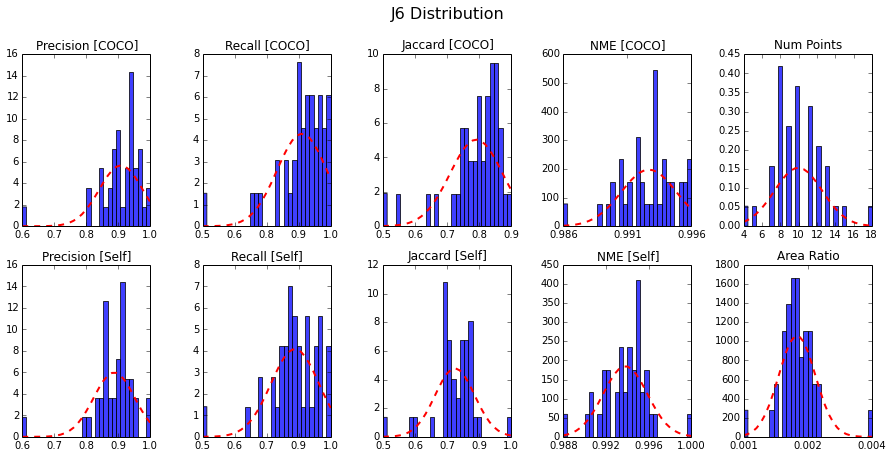

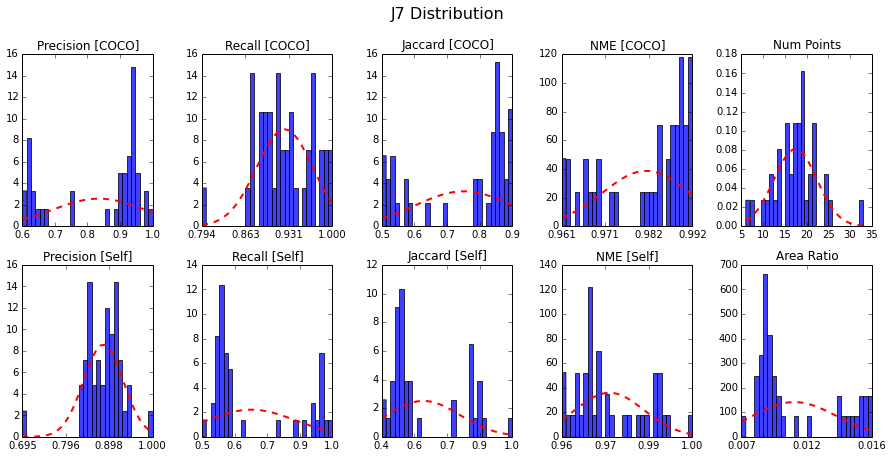

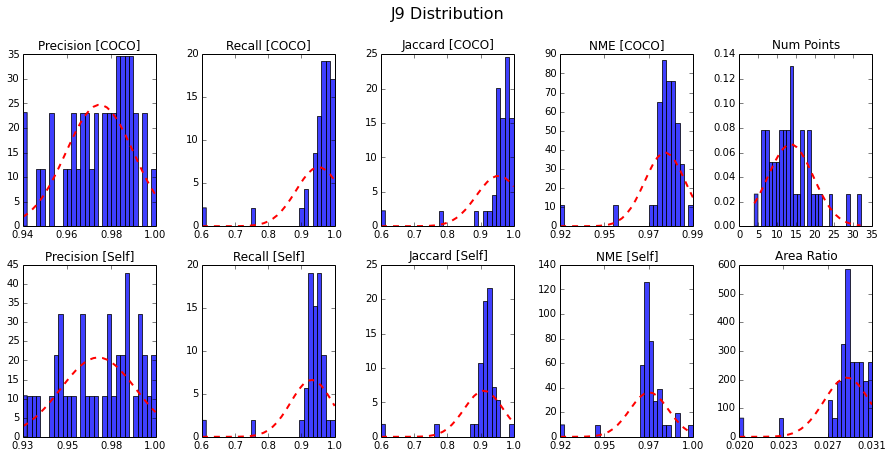

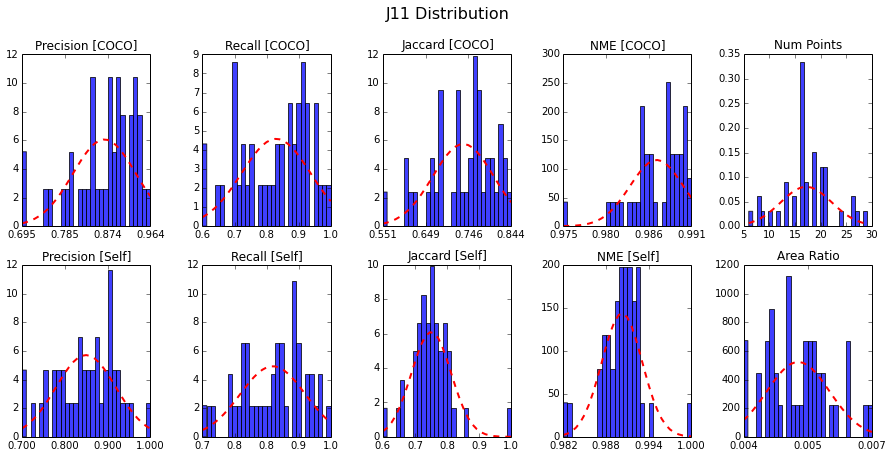

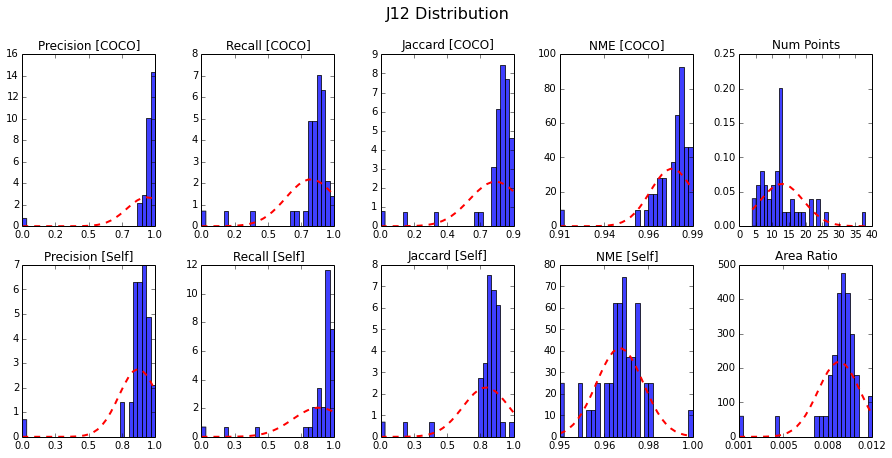

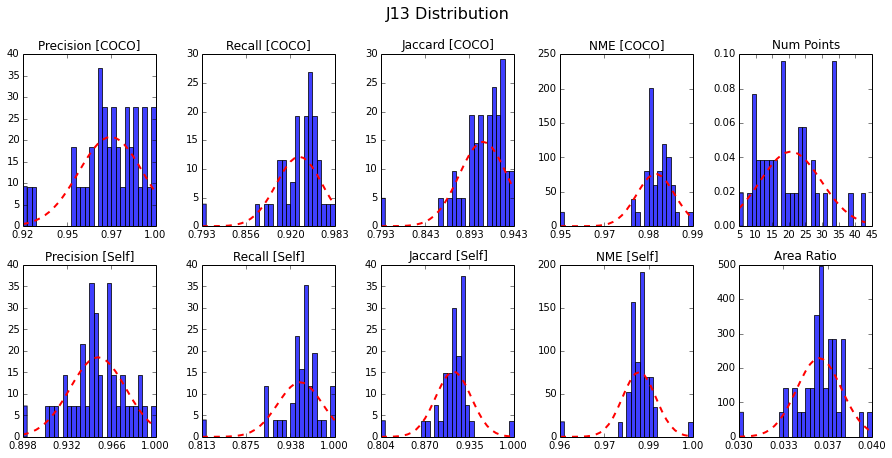

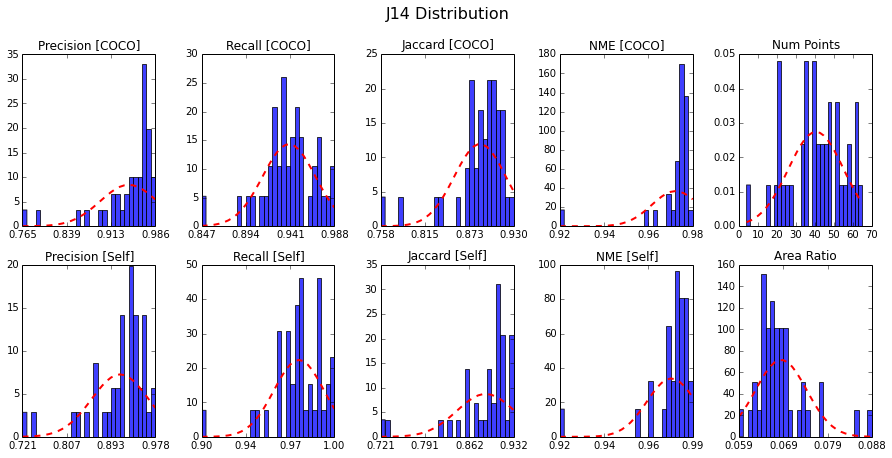

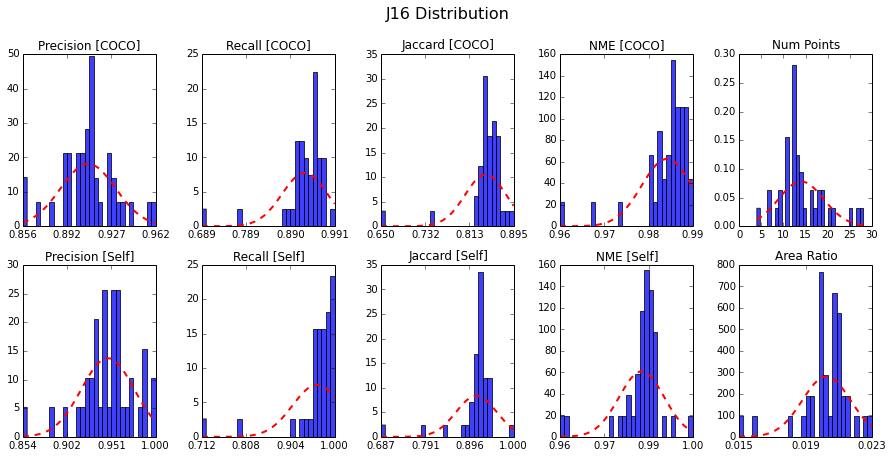

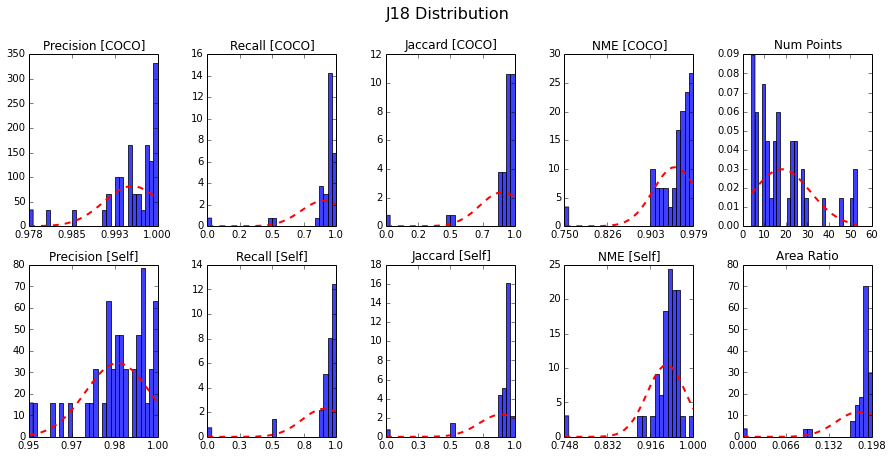

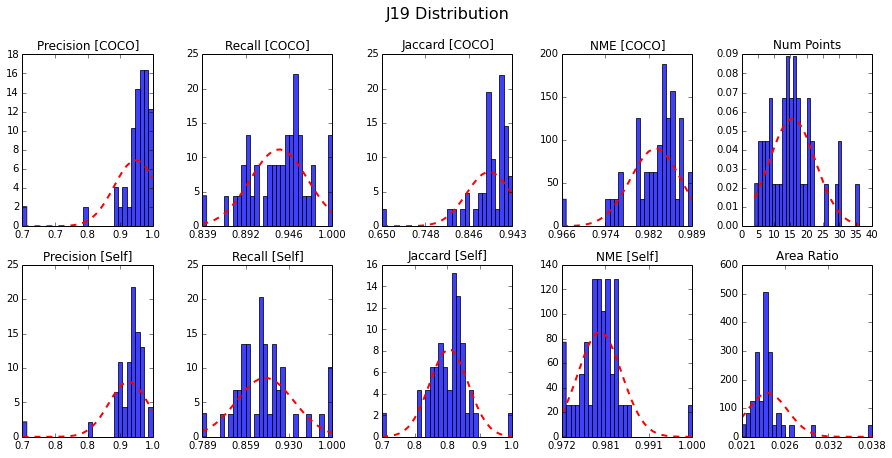

In [83]:
gaussian_fit_results = plot_all_Ji_hist(scipy.stats.norm)

In [84]:
gaussian_fit_results

,object_id,Metric,Mean,SD,RSS,D-value,p-value
0,6,Precision [COCO],0.879326,0.070482,165.836275,0.533333,2.021174e-04
1,6,Recall [COCO],0.892419,0.092750,75.916007,0.566667,6.174024e-05
2,6,Jaccard [COCO],0.790740,0.079216,125.364486,0.666667,1.143343e-06
3,6,NME [COCO],0.992756,0.002021,307966.604029,1.000000,1.797255e-14
4,6,Num Points,9.975610,2.608502,0.342224,1.000000,1.797255e-14
5,6,Precision [Self],0.882656,0.066701,183.938747,0.600000,1.755168e-05
6,6,Recall [Self],0.854184,0.097723,66.986531,0.600000,1.755168e-05
7,6,Jaccard [Self],0.762723,0.083473,131.142009,0.533333,2.021174e-04
8,6,NME [Self],0.993554,0.002159,136974.679919,1.000000,1.797255e-14
9,6,Area Ratio,0.002039,0.000377,2255567.960543,1.000000,1.797255e-14


In [85]:
#The fitting is not really statistically significant, average RSS is quite large too 
print gaussian_fit_results.RSS.mean()
print len(gaussian_fit_results[gaussian_fit_results["p-value"]>0.5])

43855.978878
0


In [ ]:
from tqdm import tqdm

In [90]:
def test_all_Ji_fit_fcn(fcns_to_test="all",NBINS=30,RAND_SAMPLING=5):
    '''
    Test all function form against all Ji distributions, then return the fitting coefficients table
    RAND_SAMPLING controls the number of objects that gets tested, running this on all 23 object will cause memory crash
    '''
    if fcns_to_test=="all":
        exclude= ['division', 'skellam', 'nbinom', 'logser', 'erlang','dlaplace', 'hypergeom', 'bernoulli', 'levy_stable', 'zipf', 'rv_discrete', 'rv_frozen', 'boltzmann', 'rv_continuous', 'entropy', 'randint', 'poisson', 'geom', 'binom', 'planck', 'print_function']
        fcns_to_test = filter(lambda x: x not in exclude,dir(stats.distributions)[9:])
    bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
    obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
    object_id_lst  = list(set(obj_sorted_tbl.object_id))
    metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',"NME [COCO]","Num Points",\
               'Precision [Self]','Recall [Self]','Jaccard [Self]',"NME [Self]","Area Ratio"]
    if RAND_SAMPLING : object_id_lst = random.choice(object_id_lst,RAND_SAMPLING)
    NUM_PLOTS = len(metrics_lst)
    NUM_ROW = 2
    NUM_COL = NUM_PLOTS/NUM_ROW
    data_fit_stats=[]
    for objid in tqdm(object_id_lst):
        # Ji_tbl (bb_info) is the set of all workers that annotated object i 
        bb  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]
        for i,metric in zip(range(len(metrics_lst)),metrics_lst):
            if metric in ["Num Points"]:
                metric_value = np.array(bb[metric])
                pltmax=metric_value.max()
            else:
                #restrict range [0,1] for normalized measures
                metric_value = np.array(bb[metric][bb[metric]>0][bb[metric]<=1]) 
                pltmax=1

            #Testing against various distributions 
            for fcn_name in fcns_to_test:
                fcn = getattr(stats,fcn_name)
                params = fcn.fit(metric_value)
                histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
                bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
                y = fcn.pdf(bins, *params)
                RSS =sum((histo-y)**2)
                ks_result = kolmogorov_smirnov(bins,y,fcn.name) #D-value and p-value
                # object_id, Metric, mu, sd,RSS,D-value,p-value
                data_stats  = [objid,fcn_name,metric,params[0],params[1],RSS,ks_result[0],ks_result[1]] 
                #same as what you would get if you did basic_stats because in the MLE estimate for Gaussians, mu and sigma is equal to sample mean and sample sd
                data_fit_stats.append(data_stats)
    fit_results =pd.DataFrame(data_fit_stats,columns=["object_id","Function", "metric", "Mean", "SD","RSS","D-value","p-value"])
    fit_results.to_csv("Ji_fit_results.csv")
    return fit_results

In [59]:
# will take about half an hour to run, consumes a lot of memory approx 12500 rows in pd table
# fit_results =test_all_Ji_fit_fcn()
# memory crashes about a quarter of the way there 
# 22%|█████████████████▏ | 5/23 [09:57<35:52, 0.01it/s]

In [60]:
idx = fit_results.groupby(['Metric'])['RSS'].transform(min) ==fit_results["RSS"]
fit_results[idx]

,object_id,Function,Metric,Mean,SD,RSS,D-value,p-value
147,6,powerlaw,Recall [COCO],2.568632,0.647553,75.889543,0.525,1.578711e-05
174,6,burr,Jaccard [COCO],1996701.897381,0.138045,182.273927,0.575,1.513809e-06
490,6,rice,Precision [Self],2.394311,0.759598,110.150786,0.475,1.330354e-04
883,7,johnsonsu,Precision [COCO],0.978965,0.544662,201.598379,0.450,3.565228e-04
1654,7,nct,Area Ratio,0.886511,1.830797,323603.061541,1.000,6.133848e-19
2011,9,vonmises_line,NME [COCO],3.545561,0.977684,3404.012967,0.575,1.513809e-06
2071,9,mielke,Num Points,1.400609,4.799737,0.057151,1.000,6.133848e-19
2224,9,invgauss,Recall [Self],0.023553,0.819568,61.424139,0.750,7.714369e-11
2311,9,johnsonsu,Jaccard [Self],0.231732,0.650057,108.857124,0.625,1.172933e-07
2395,9,johnsonsu,NME [Self],-0.246940,0.568834,3036.697322,0.625,1.172933e-07


In [61]:
fit_results[fit_results["p-value"]>0.5]

,object_id,Function,Metric,Mean,SD,RSS,D-value,p-value
977,7,lomax,Recall [COCO],7.217280e+08,0.794276,1877.237103,0.1,0.983366


##### random sampling on 5 objects, takes about 6 min to run 

In [94]:
# fit_results =test_all_Ji_fit_fcn(RAND_SAMPLING=5)

In [95]:
fit_results = pd.read_csv("Ji_fit_results.csv")

In [97]:
idx = fit_results.groupby(['metric'])['RSS'].transform(min) ==fit_results["RSS"]
fit_results[idx]

,Unnamed: 0,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
14,14,19,exponpow,Precision [COCO],1.627056e+08,-4465282.667100,43.433739,0.633333,4.643599e-06
1164,1164,14,t,NME [COCO],1.018819e+00,0.978102,2411.336583,0.566667,6.174024e-05
1204,1204,14,genhalflogistic,Num Points,7.214238e-01,15.000000,0.005643,1.000000,1.797255e-14
2131,2131,41,gilbrat,Precision [Self],1.914507e-02,0.019992,31.326314,0.600000,1.755168e-05
2424,2424,41,t,NME [Self],3.486191e-01,0.890849,2303.713793,0.533333,2.021174e-04
2466,2466,41,genpareto,Area Ratio,-1.795335e+00,-0.003283,8236.210632,1.000000,1.797255e-14
3180,3180,7,t,Jaccard [Self],7.349309e-01,0.515689,83.241969,0.566667,6.174024e-05
3476,3476,6,gompertz,Recall [COCO],1.508553e-02,0.692169,41.949766,0.466667,1.745950e-03
3534,3534,6,burr,Jaccard [COCO],1.996702e+06,0.138045,46.939294,0.600000,1.755168e-05
3934,3934,6,rice,Recall [Self],2.833512e+00,0.616945,62.891089,0.533333,2.021174e-04


In [98]:
fit_results[fit_results["p-value"]>0.5]

,Unnamed: 0,object_id,Function,metric,Mean,SD,RSS,D-value,p-value
1805,1805,41,invweibull,Recall [COCO],1.000000e+00,0.000000,357.286523,0.2,0.537200
2657,2657,7,lomax,Recall [COCO],7.217280e+08,0.794276,1201.180892,0.1,0.996969


testing only interpretable,likely functions

In [111]:
fit_results =test_all_Ji_fit_fcn(fcns_to_test=['norm','johnsonsu','exponpow','t','genpareto'],RAND_SAMPLING=False)

In [114]:
idx = fit_results.groupby(['metric'])['RSS'].transform(min) ==fit_results["RSS"]
fit_results[idx].drop("object_id",axis=1)

,Function,metric,Mean,SD,RSS,D-value,p-value
203,t,Precision [COCO],1.516051,0.961724,14.940744,0.700000,2.619896e-07
212,exponpow,Jaccard [COCO],8.238207,0.396909,10.234424,0.633333,4.643599e-06
227,exponpow,Precision [Self],2.697500,0.715316,9.118679,0.733333,5.586982e-08
431,johnsonsu,Recall [Self],0.951170,0.601479,11.937833,0.500000,6.157790e-04
441,johnsonsu,NME [Self],0.636654,0.946433,141.942812,0.500000,6.157790e-04
723,t,Num Points,41.318935,56.865187,0.000920,1.000000,1.797255e-14
746,johnsonsu,Area Ratio,0.887783,0.459264,111.366893,0.433333,4.607065e-03
908,t,Recall [COCO],1.008015,0.985744,6.213872,0.800000,2.047957e-09
937,exponpow,Jaccard [Self],3.846984,0.885654,10.304681,0.900000,8.383579e-12
966,johnsonsu,NME [COCO],0.774936,0.368741,117.115048,0.733333,5.586982e-08


In [115]:
print tabulate(fit_results[idx].drop("object_id",axis=1),showindex="False",headers='keys',tablefmt='latex',floatfmt='.3g')

\begin{tabular}{llrrrrr}
\hline
 Function   & metric           &   Mean &     SD &       RSS &   D-value &   p-value \\
\hline
 t          & Precision [COCO] &  1.52  &  0.962 &  14.9     &     0.7   &  2.62e-07 \\
 exponpow   & Jaccard [COCO]   &  8.24  &  0.397 &  10.2     &     0.633 &  4.64e-06 \\
 exponpow   & Precision [Self] &  2.7   &  0.715 &   9.12    &     0.733 &  5.59e-08 \\
 johnsonsu  & Recall [Self]    &  0.951 &  0.601 &  11.9     &     0.5   &  0.000616 \\
 johnsonsu  & NME [Self]       &  0.637 &  0.946 & 142       &     0.5   &  0.000616 \\
 t          & Num Points       & 41.3   & 56.9   &   0.00092 &     1     &  1.8e-14  \\
 johnsonsu  & Area Ratio       &  0.888 &  0.459 & 111       &     0.433 &  0.00461  \\
 t          & Recall [COCO]    &  1.01  &  0.986 &   6.21    &     0.8   &  2.05e-09 \\
 exponpow   & Jaccard [Self]   &  3.85  &  0.886 &  10.3     &     0.9   &  8.38e-12 \\
 johnsonsu  & NME [COCO]       &  0.775 &  0.369 & 117       &     0.733 &  5.59e

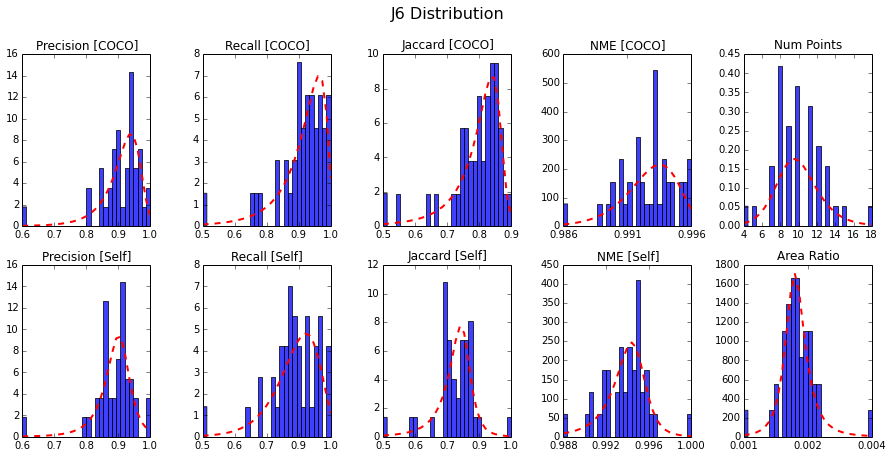

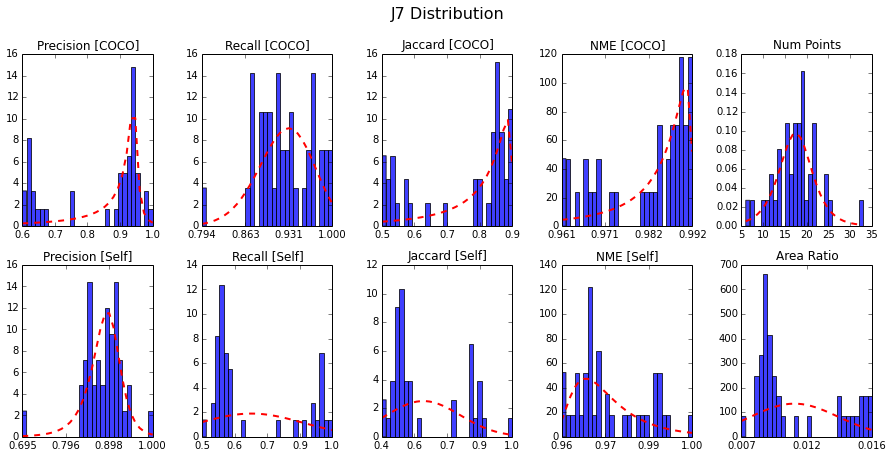

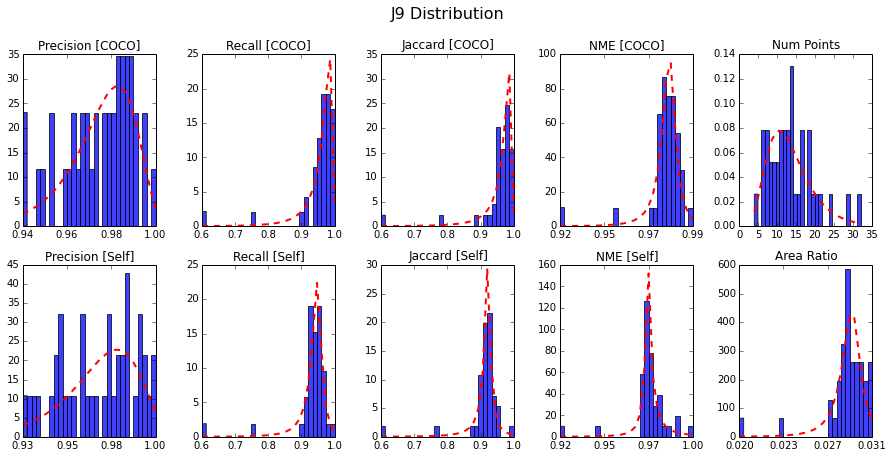

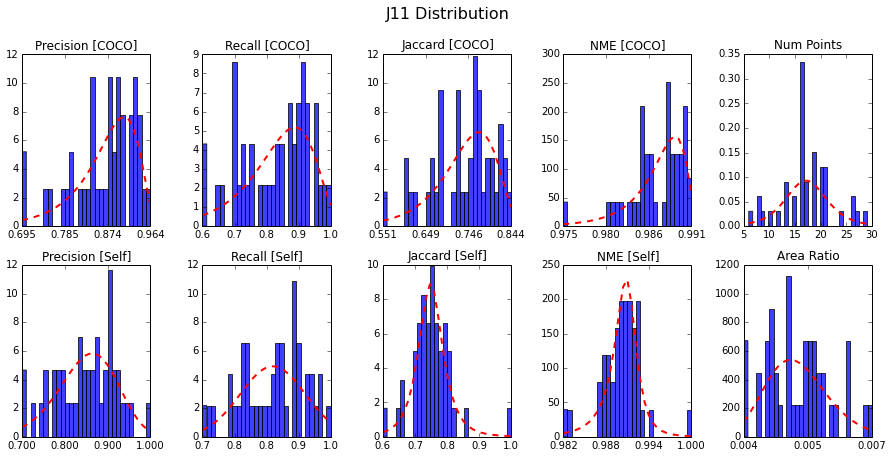

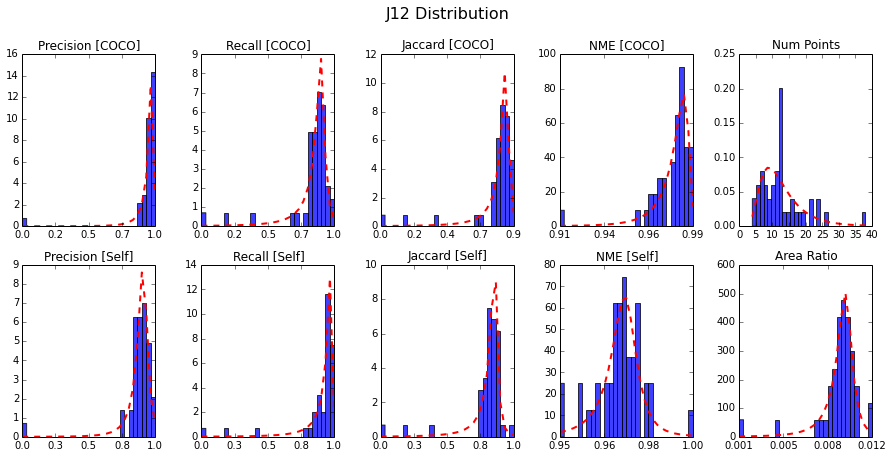

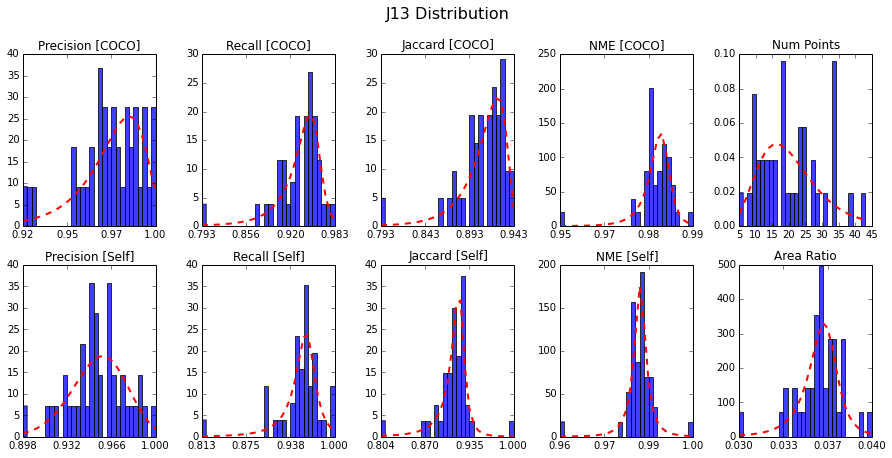

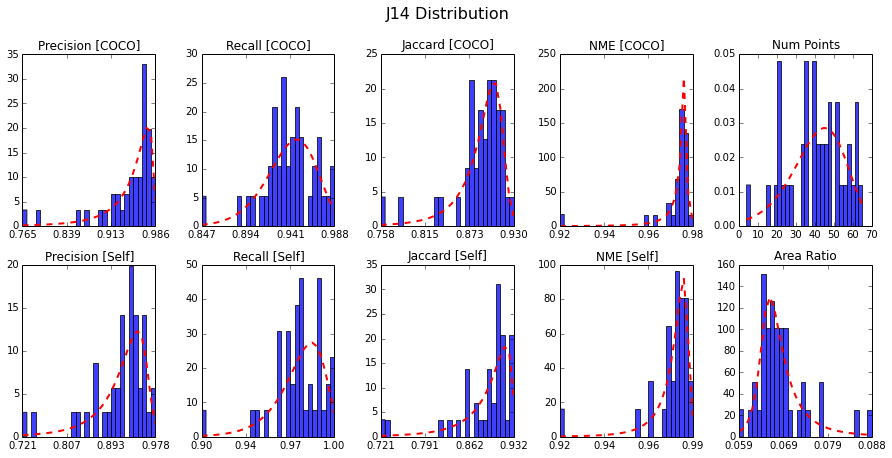

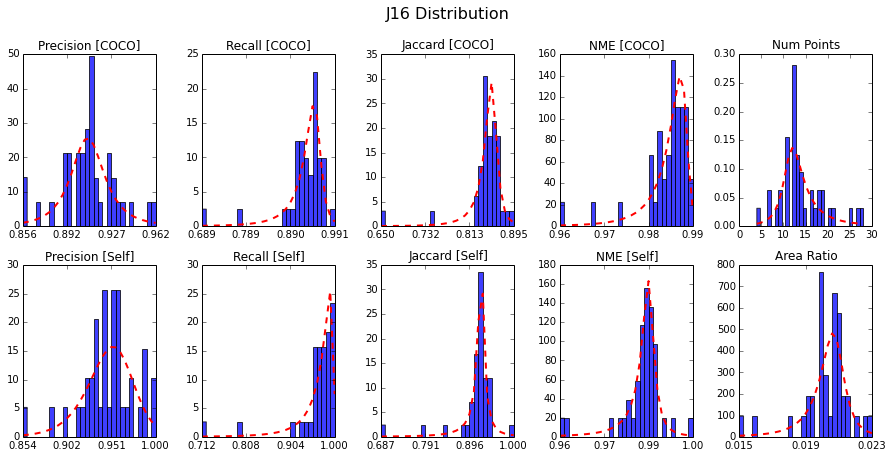

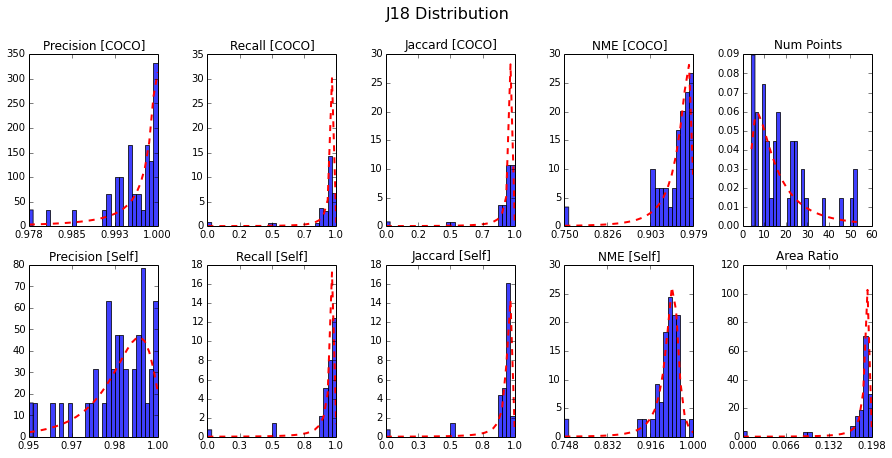

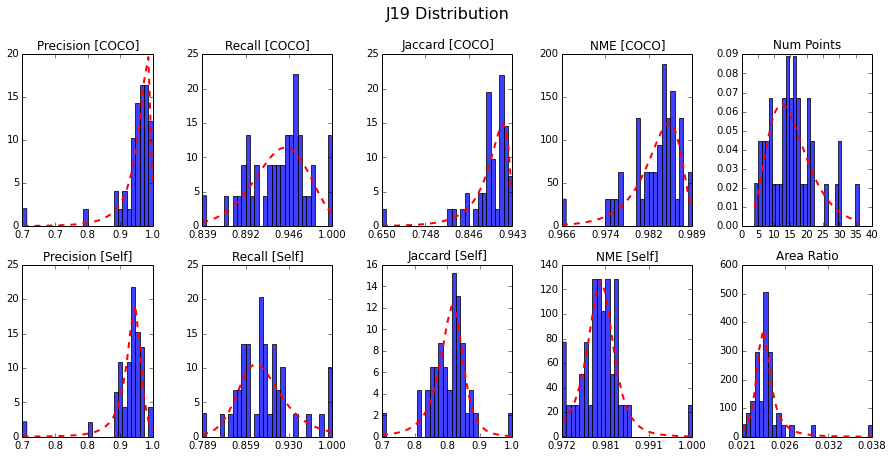

In [117]:
johnsonsu_fit_results = plot_all_Ji_hist(scipy.stats.johnsonsu)

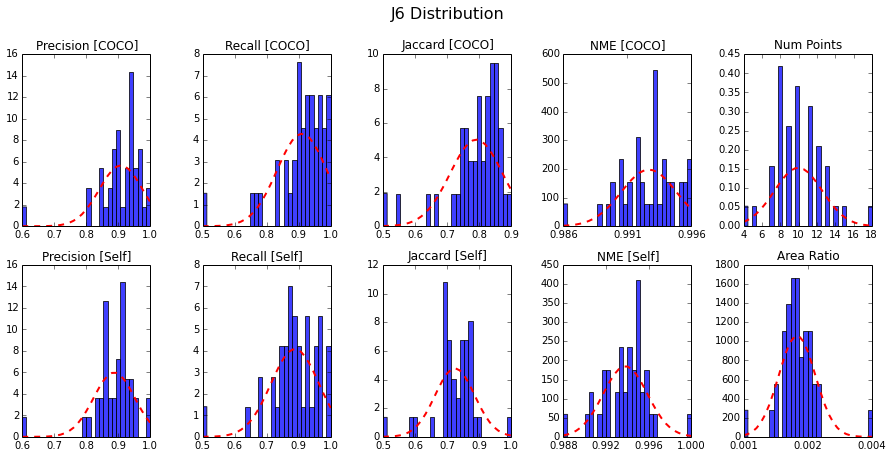

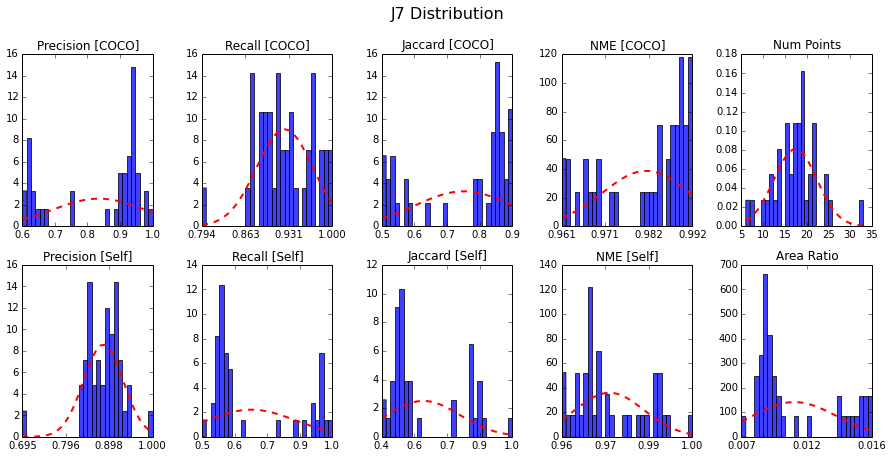

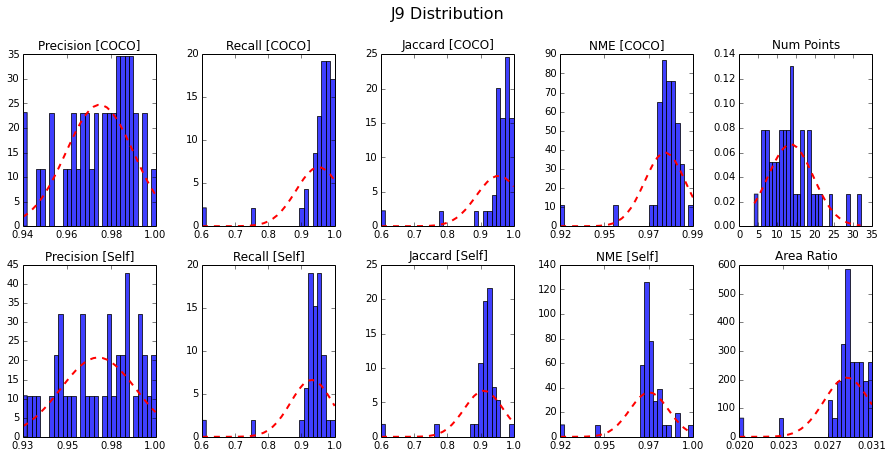

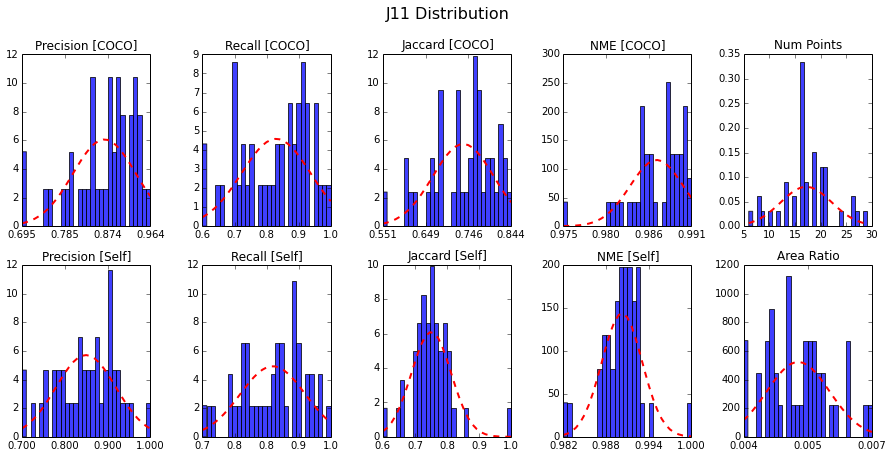

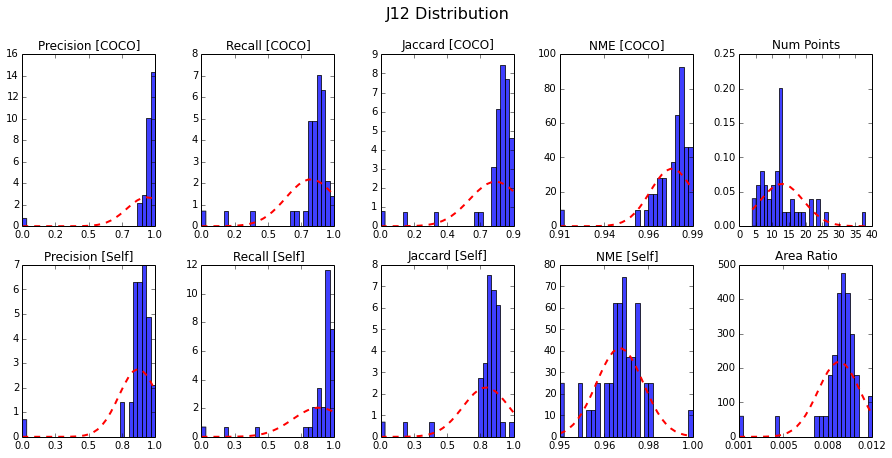

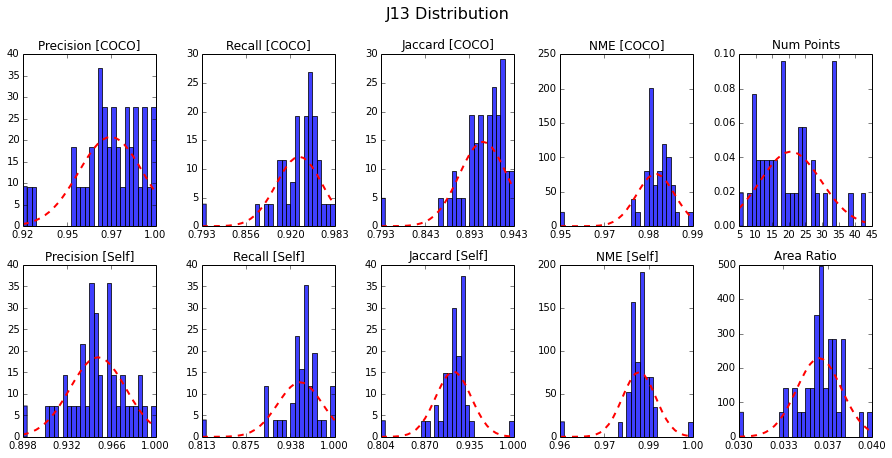

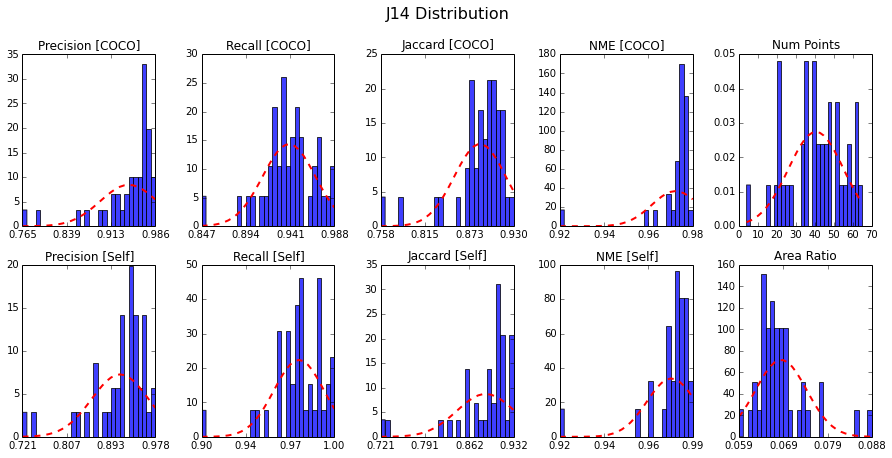

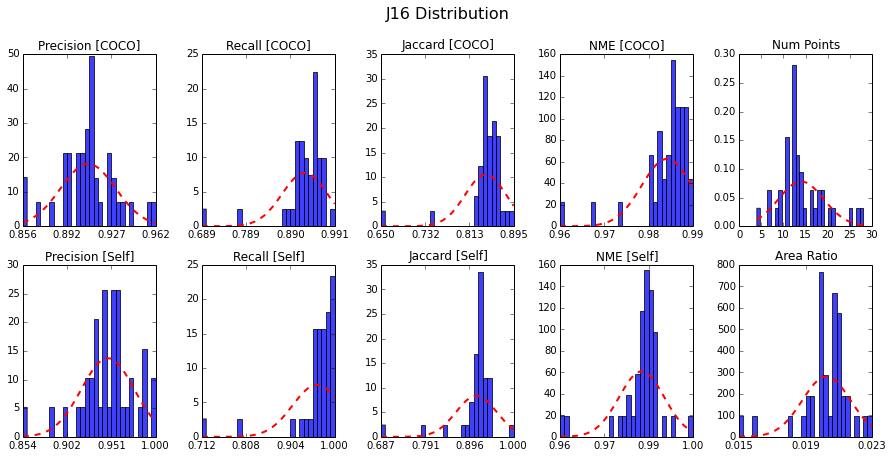

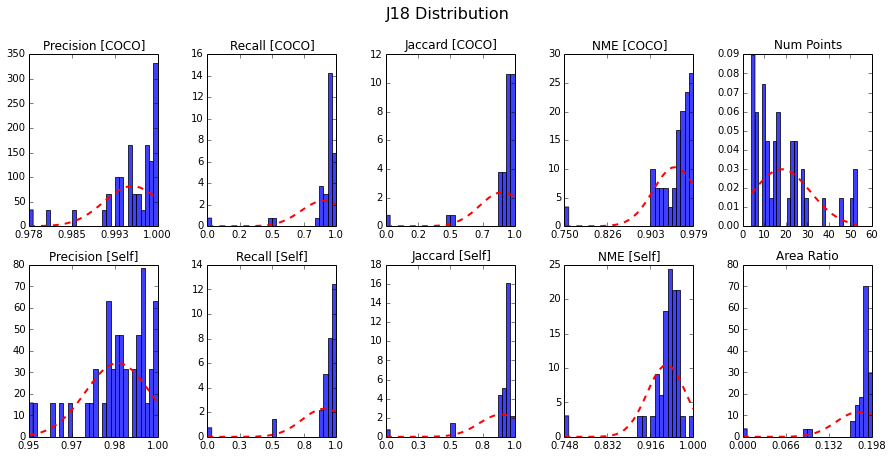

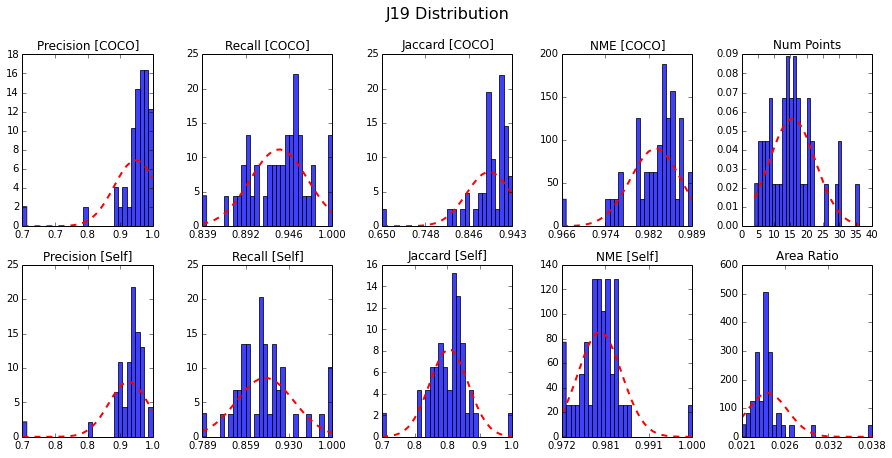

In [118]:
gaussian_fit_results = plot_all_Ji_hist(scipy.stats.norm)

In [120]:
#The fitting is not really statistically significant, average RSS is quite large too 
print gaussian_fit_results.RSS.mean()
print len(gaussian_fit_results[gaussian_fit_results["p-value"]>0.5])

43855.978878
0


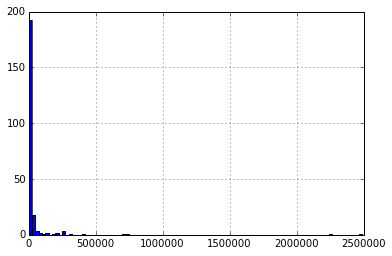

In [123]:
gaussian_fit_results.RSS.hist(bins=100)

{'boxes': [<matplotlib.lines.Line2D at 0x11873b350>],
 'caps': [<matplotlib.lines.Line2D at 0x11f258f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11089ac50>,
 'medians': [<matplotlib.lines.Line2D at 0x11873b6d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11f258fd0>,
  <matplotlib.lines.Line2D at 0x11f258a90>]}

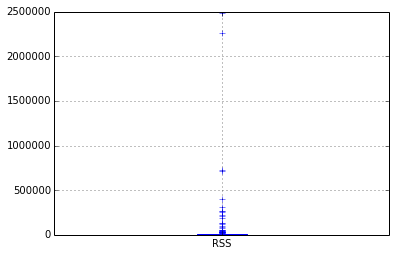

In [127]:
gaussian_fit_results.boxplot(column="RSS")

In [198]:
def RSSBoxplot(fit_results,fcn_name):
    data_lst = []
    for metric in metrics_lst:
        data = np.array(fit_results[fit_results["Metric"]==metric].RSS)
        data_lst.append(data)
    fig,ax = plt.subplots()
    ax.set_yscale('log')
    plt.boxplot(data_lst)
    plt.ylim(0,1e6)
    plt.ylabel("{} fit RSS".format(fcn_name),fontsize=12)
    p = ax.set_xticklabels([metrics_lst[i] for i in range(len(metrics_lst))], rotation=25,ha='right',fontsize=12)
    plt.tight_layout()
    plt.savefig("{}RSSBoxplot.pdf".format(fcn_name))

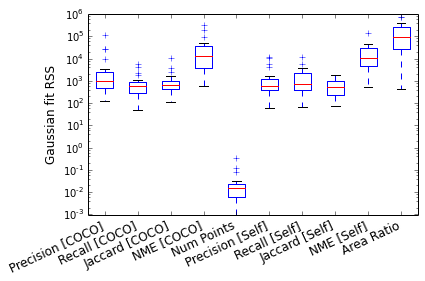

In [199]:
RSSBoxplot(gaussian_fit_results,"Gaussian")

### Testing Assumption 3: Influence of task difficulty on spread

In [267]:
fcn = scipy.stats.norm
params = fcn.fit(metric_value)
histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
y = fcn.pdf(bins, *params)
RSS =sum((histo-y)**2)
(mean(metric_value),std(metric_value))==params

True

In [310]:
import ast
def std_fits_num_points(NBINS=30):
    '''
    Compute std for Gaussian and Johnson SU fits
    '''
    bb_info = pd.read_csv('computed_my_COCO_BBvals.csv')
    obj_sorted_tbl =  bb_info[bb_info['Jaccard [COCO]']!=-1][bb_info['Jaccard [COCO]']!=0][bb_info['Jaccard [Self]']!=0].sort('object_id')
    object_id_lst  = list(set(obj_sorted_tbl.object_id))
    metrics_lst = ['Precision [COCO]','Recall [COCO]','Jaccard [COCO]',"NME [COCO]","Num Points",\
               'Precision [Self]','Recall [Self]','Jaccard [Self]',"NME [Self]","Area Ratio"]
    data_fit_stats=[]
    for objid in tqdm(object_id_lst):
        # Ji_tbl (bb_info) is the set of all workers that annotated object i 
        bb  = obj_sorted_tbl[obj_sorted_tbl["object_id"]==objid]
        numPoints = bb["x_locs"].apply(lambda x: len(ast.literal_eval(x))).mean()
        for i,metric in zip(range(len(metrics_lst)),metrics_lst):
            if metric in ["Num Points"]:
                metric_value = np.array(bb[metric])
            else:
                #restrict range [0,1] for normalized measures
                metric_value = np.array(bb[metric][bb[metric]>0][bb[metric]<=1]) 
            
            fcn = scipy.stats.johnsonsu 
            a,b,scale,loc = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, a,b,scale,loc)
            RSS =sum((histo-y)**2)
            ks_result = kolmogorov_smirnov(bins,y,fcn.name) #D-value and p-value
            # object_id, Metric, mu, sd,RSS,D-value,p-value
            data_stats  = [objid,metric,numPoints,fcn.mean(a,b),fcn.std(a,b),RSS,ks_result[0],ks_result[1]] 

            
            fcn = scipy.stats.norm
            params = fcn.fit(metric_value)
            histo,bin_edges = np.histogram(metric_value, NBINS, normed=1)
            bins = ((bin_edges+np.roll(bin_edges,-1))/2)[:-1]
            y = fcn.pdf(bins, *params)
            RSS =sum((histo-y)**2)
            data_stats.extend([params[0],params[1],RSS,ks_result[0],ks_result[1]])
            
            data_fit_stats.append(data_stats)
        
            

    fit_results =pd.DataFrame(data_fit_stats,columns=["object_id", "Metric","Average Num Points","Mean [JSU]", "SD [JSU]","RSS [JSU]","D-value [JSU]","p-value [JSU]",
                                                     "Mean [Norm]", "SD [Norm]","RSS [Norm]","D-value [Norm]","p-value [Norm]"])
    return fit_results

In [311]:
std_fits_data = std_fits_num_points()

##### Perform a linear regression of SD spread of distribution versus the average number of points in the plot (i.e. how hard it is to draw the BB)

These plots don't make sense since they mix up all the metrics, we need to examine each metric separately to see it more clearly. the good linear fit for the large range comes from metric = numpoint so it is almost x=y since the plot is numPts v.s. numPts'

In [449]:
# plt.plot(std_fits_data["SD [Norm]"],std_fits_data["Average Num Points"],'o')
# nan_filtered_std_fits_data = std_fits_data[~std_fits_data["SD [JSU]"].isnull()][std_fits_data["SD [JSU]"]<100000]
# xdata = nan_filtered_std_fits_data["SD [JSU]"]
# ydata = nan_filtered_std_fits_data["Average Num Points"]
# oid = nan_filtered_std_fits_data["object_id"]
# plt.plot(xdata,ydata,'o')
# for x,y,oid in zip(xdata,ydata,oid):
#     plt.text(x+0.01,y+0.01,oid)

Outliers: 
- 3 chocolate : there is quite a few imprecise BB drawn. 
- 12 knife, very narrow object, hard to annotate
- 15 car, also a small object, hard to annotate
- 9 book, several disagreements
- 40 driver (small,hard to annotate) 
- 41 yellow bannana (task ambiguity)
- 18 monitor, although this is quite a rectangular looking object, there is also quite a few disagreement in the border regions

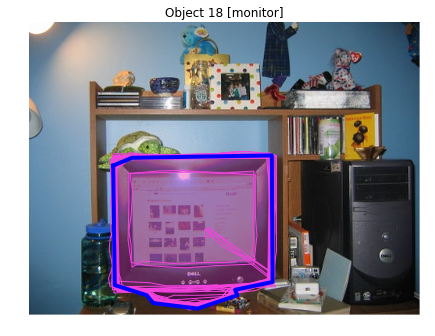

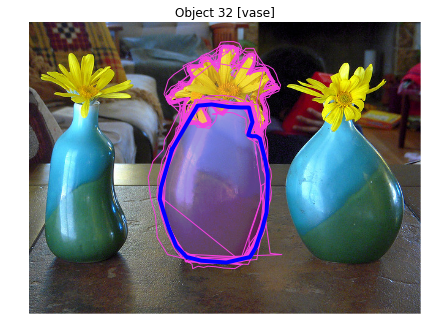

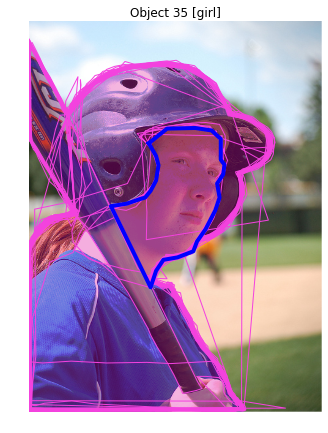

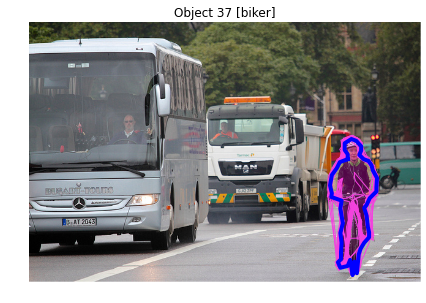

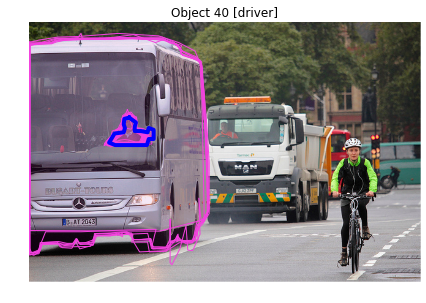

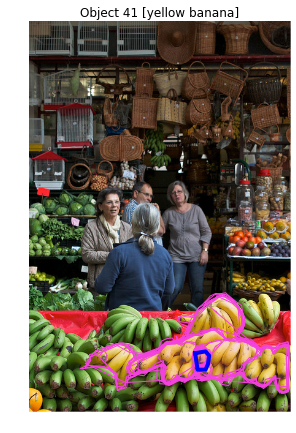

In [497]:
# visualize_bb_objects(9)
visualize_bb_objects(18)
visualize_bb_objects(32)
visualize_bb_objects(35)
visualize_bb_objects(37)
# visualize_bb_objects(39)
visualize_bb_objects(40)
visualize_bb_objects(41)

R: 0.208893612516
p-value:  0.437501240752
there is no relationship between the variables
R: -0.32439794729
p-value:  0.220264582503
there is no relationship between the variables
R: -0.127104463125
p-value:  0.639007768882
there is no relationship between the variables
R: 0.180112624025
p-value:  0.504451853789
there is no relationship between the variables
R: 0.151655287625
p-value:  0.575020336672
there is no relationship between the variables
R: 0.853723903492
p-value:  2.58647617523e-05
NOT there is no relationship between the variables
R: 0.590190102548
p-value:  0.016095950818
NOT there is no relationship between the variables
R: -0.131977792303
p-value:  0.626096212303
there is no relationship between the variables
R: -0.226173079929
p-value:  0.399619345837
there is no relationship between the variables
R: 0.0269405030872
p-value:  0.921108376744
there is no relationship between the variables


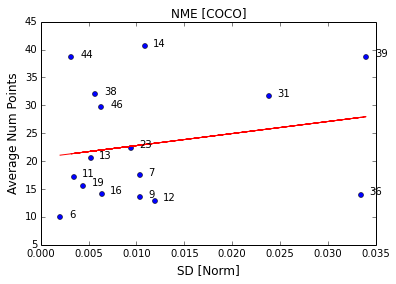

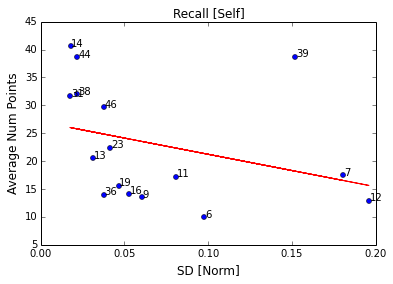

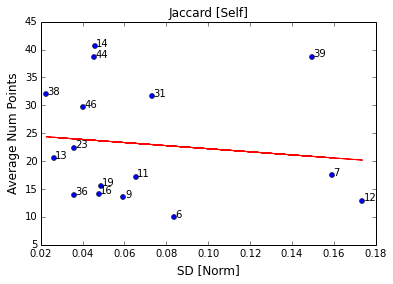

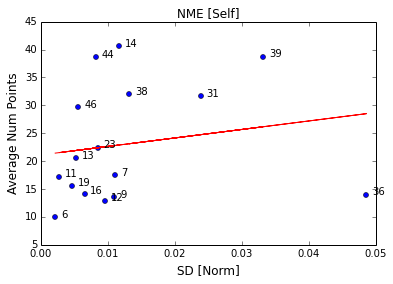

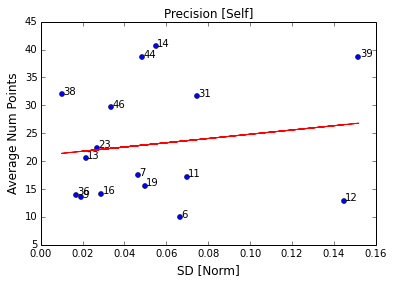

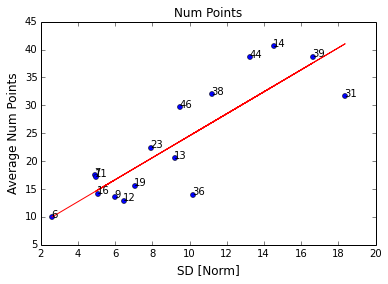

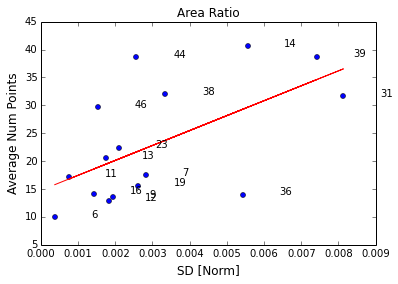

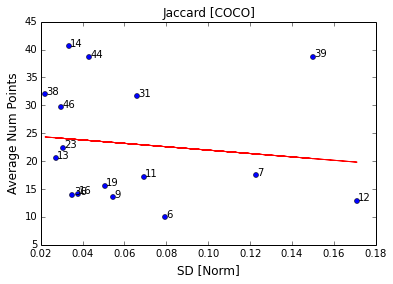

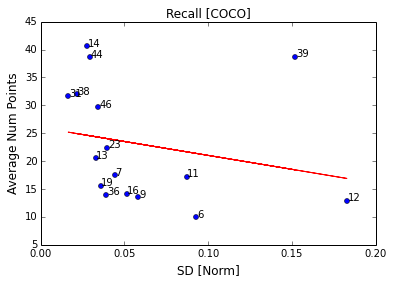

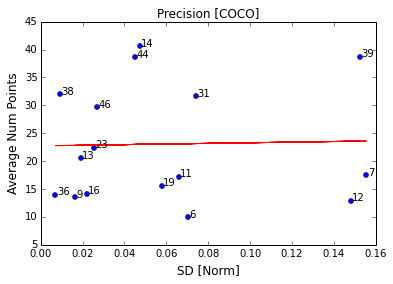

In [500]:
metrics = list(set(std_fits_data["Metric"]))
task_ambiguous_outlier =[18,32,33,35,37,40,41]
data_tbl = []
for metric in metrics:
    plt.figure()
    plt.title(metric)
    metric_only_fit_result = std_fits_data[std_fits_data["Metric"]==metric][~std_fits_data["object_id"].isin(task_ambiguous_outlier)]
    xdata = metric_only_fit_result["SD [Norm]"]
    ydata= metric_only_fit_result["Average Num Points"]
    oid = metric_only_fit_result["object_id"]
    for x,y,oid in zip(xdata,ydata,oid):
        plt.text(x+0.001,y+0.001,oid)
    plt.plot(xdata,ydata,'o',color="blue",ms=5)    
    plt.xlabel(xname,fontsize=12)
    plt.ylabel(yname,fontsize=12)
    params = np.polyfit(xdata,ydata,1)
    fcn = np.poly1d(params)
    y_interpolate = fcn(xdata)
    plt.plot(xdata,y_interpolate,'red')
    results =stats.pearsonr(xdata,ydata)
    R = results[0]
    pval = results[1]
    print "R:",R
    print "p-value: ",pval
    print pcheck(results[1],"there is no relationship between the variables")
    # metric, R, p-value , t-value, p-value 
    data_tbl.append([metric,R,pval,result[0],result[1]])

In [491]:
print tabulate(pd.DataFrame(data_tbl,columns=["Metric", "R", "p [MW]" , "U", "p [MW]"]),floatfmt='.3e',showindex="False",headers='keys',tablefmt='latex')

\begin{tabular}{lrrrr}
\hline
 Metric           &          R &    p [MW] &         U &    p [MW] \\
\hline
 NME [COCO]       &  3.159e-01 & 2.168e-01 & 0.000e+00 & 3.527e-07 \\
 Recall [Self]    & -3.629e-01 & 1.522e-01 & 0.000e+00 & 3.527e-07 \\
 Jaccard [Self]   & -1.147e-01 & 6.610e-01 & 0.000e+00 & 3.527e-07 \\
 NME [Self]       &  2.727e-01 & 2.897e-01 & 0.000e+00 & 3.527e-07 \\
 Precision [Self] &  1.783e-01 & 4.935e-01 & 0.000e+00 & 3.527e-07 \\
 Num Points       &  8.392e-01 & 2.533e-05 & 3.100e+01 & 4.969e-05 \\
 Area Ratio       &  6.042e-01 & 1.021e-02 & 0.000e+00 & 3.527e-07 \\
 Jaccard [COCO]   & -1.105e-01 & 6.729e-01 & 0.000e+00 & 3.527e-07 \\
 Recall [COCO]    & -2.680e-01 & 2.983e-01 & 0.000e+00 & 3.527e-07 \\
 Precision [COCO] &  4.823e-02 & 8.541e-01 & 0.000e+00 & 3.527e-07 \\
\hline
\end{tabular}


All the hypothesis test (Mann whitney, t-test) assume samples come from the same population, they consider the same variable conditioned on different things, rather than testing for independnece betwee n two diferent variables. Chi2 sort of works for this but it has the normality assumption built in.

In [ ]:
nan_filtered_std_fits_data = std_fits_data[~std_fits_data["SD [JSU]"].isnull()]

In [563]:
task_ambiguous_outlier =[18,22,32,35,37,40,41]
data_tbl = []

#     data =[sd_name]
for metric in metrics_lst:
    data =[]
    for sd_name in ["SD [Norm]","SD [JSU]"]:
        metric_only_fit_result = nan_filtered_std_fits_data[nan_filtered_std_fits_data["Metric"]==metric][~nan_filtered_std_fits_data["object_id"].isin(task_ambiguous_outlier)]


        xdata = metric_only_fit_result[sd_name]
        ydata= metric_only_fit_result["Average Num Points"]
        oid = metric_only_fit_result["object_id"]
        
#         plt.figure()
#         plt.title(metric)
#         for x,y,oid in zip(xdata,ydata,oid):
#             plt.text(x+0.001,y+0.001,oid)
#         plt.plot(xdata,ydata,'o',color="blue",ms=5)    
#         plt.xlabel(xname,fontsize=12)
#         plt.ylabel(yname,fontsize=12)
#         params = np.polyfit(xdata,ydata,1)
#         fcn = np.poly1d(params)
#         y_interpolate = fcn(xdata)
#         plt.plot(xdata,y_interpolate,'red')
        
        results =stats.pearsonr(xdata,ydata)
        R = results[0]
        pval = results[1]
#         print "R:",R
#         print "p-value: ",pval
#         print pcheck(results[1],"there is no linear correlation between the variables")
        data.extend([R,pval])
    data_tbl.append(data)

In [592]:
result_tbl = pd.DataFrame(data_tbl).T
result_tbl.columns = ['P [C]', 'R [C]', 'J [C]','NME [C]','NumPt','P [C]','R [S]', 'J [S]','NME [S]','Area']
result_tbl.index=['R [Norm]','p[Norm]','R [JSU]','p [JSU]']

In [593]:
result_tbl

,P [C],R [C],J [C],NME [C],NumPt,P [C],R [S],J [S],NME [S],Area
R [Norm],0.048233,-0.268011,-0.110509,0.315886,0.839244,0.178326,-0.362945,-0.045290,0.272680,0.604159
p[Norm],0.854148,0.298317,0.672856,0.216772,0.000025,0.493488,0.152187,0.867725,0.289651,0.010212
R [JSU],0.310844,0.016643,0.032022,-0.123913,-0.262019,0.474351,-0.186027,0.613525,0.509926,0.274909
p [JSU],0.224599,0.949448,0.902895,0.635626,0.309660,0.054380,0.474693,0.011482,0.036516,0.285570


In [594]:
print tabulate(result_tbl,headers='keys',tablefmt='latex',floatfmt=".2f")

\begin{tabular}{lrrrrrrrrrr}
\hline
          &   P [C] &   R [C] &   J [C] &   NME [C] &   NumPt &   P [C] &   R [S] &   J [S] &   NME [S] &   Area \\
\hline
 R [Norm] &    0.05 &   -0.27 &   -0.11 &      0.32 &    0.84 &    0.18 &   -0.36 &   -0.05 &      0.27 &   0.60 \\
 p[Norm]  &    0.85 &    0.30 &    0.67 &      0.22 &    0.00 &    0.49 &    0.15 &    0.87 &      0.29 &   0.01 \\
 R [JSU]  &    0.31 &    0.02 &    0.03 &     -0.12 &   -0.26 &    0.47 &   -0.19 &    0.61 &      0.51 &   0.27 \\
 p [JSU]  &    0.22 &    0.95 &    0.90 &      0.64 &    0.31 &    0.05 &    0.47 &    0.01 &      0.04 &   0.29 \\
\hline
\end{tabular}


We can conduct separate analysis based on 3  different errors

In [580]:
task_ambiguity = [1,4,8,10,18,20,22,27,28,29,30,31,32,33,35,40,42]
small_area = [1,15,22]
high_numPts=[5,7,9,10,11,12,28,29,30,37]